# <font color=DarkOrange>Geely Automobile Pricing Model</font>
    
    - Debasis Garabadu

## <font color=Indigo>Business Objective</font>

Chinese automobile company Geely Auto aspires to set up their car manufacturing unit in US market and simultaneously can provide competition to their US and European counterparts. The company wants to know:

> - Which variables are significant in predicting the price of a car
> - How well those variables describe the price of a car

## <font color=Indigo>Analysis Process</font>
The analysis is divided into ten main parts:
> 1. Data Sourcing or Data Understanding
2. Data cleaning and Derived Metrics
3. Data Analysis (Univariate, Bivariate Analysis)
4. Model Preparation
5. Training and Testing set Data Split
6. Model Building
7. Residual Analysis of the Train Data
8. Making Predictions
9. Model Evaluation
10. Final Inference

### <font color=Indigo>Prerequisites</font>
> - numpy version: 1.16.1
- pandas version: 0.24.1
- seaborn version: 0.9.0

### <font color=Indigo>Import Libraries</font>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

# Set Style
sns.set(style = "whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')

## <font color=green>1. Data Sourcing</font>

In [2]:
# 1.1 Import File 
car = pd.read_csv('CarPrice_Assignment.csv', sep = ',', encoding = 'ISO-8859-1', skipinitialspace = True)

# Data Glimpse
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [3]:
# 1.2 Set Car ID as the index and subtract number one to start the index from zero.
car.set_index('car_ID', inplace = True)

car.index = car.index - 1

# Data Glimpse
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


## <font color=green>2. Data Cleaning and Derived Metrics</font>

In [4]:
# 2.1 Initial DataFrame Shape (Observations, Variables)
car.shape

(205, 25)

        Delete Unnecessary Rows and Columns

In [5]:
# 2.2 Get the Percentage Rate of NaN or NULL values in each column
round(car.isnull().sum(axis = 0)/len(car), 2)*100

symboling          0.0000
CarName            0.0000
fueltype           0.0000
aspiration         0.0000
doornumber         0.0000
carbody            0.0000
drivewheel         0.0000
enginelocation     0.0000
wheelbase          0.0000
carlength          0.0000
carwidth           0.0000
carheight          0.0000
curbweight         0.0000
enginetype         0.0000
cylindernumber     0.0000
enginesize         0.0000
fuelsystem         0.0000
boreratio          0.0000
stroke             0.0000
compressionratio   0.0000
horsepower         0.0000
peakrpm            0.0000
citympg            0.0000
highwaympg         0.0000
price              0.0000
dtype: float64

> None of the Columns has NULL or NaN values. So, nothing needs to be dropped.

In [6]:
# 2.3 Get the Percentage Rate of NaN or NULL values in each rows
rows = pd.DataFrame(data = round(car.isnull().sum(axis = 1)/len(car), 2)*100, columns = ['null_percent'])
rows[rows.null_percent > 0].index

Int64Index([], dtype='int64', name='car_ID')

> None of the Rows has NULL or NaN values. So, nothing needs to be dropped.

In [7]:
# 2.4 Dropping any Duplicate Rows, if any (Keeping the First Value and dropping the rest)
car.drop_duplicates(keep = 'first', inplace = True)

In [8]:
# 2.5 Final DataFrame Shape (Observations, Variables)
car.shape

(205, 25)

> Intial Shape (Before Data Cleaning) and Final shape (After Data Cleaning) remains same.

In [9]:
# 2.6 Concise Summary
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [10]:
# 2.7 Getting Car Company from CarName Variable
car['carcompany'] = car.CarName.str.split(' ').str[0]

# 2.8 Dropping Variable CarName
car.drop('CarName', axis = 1, inplace = True)

# Data Glimpse
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,2,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi


In [11]:
# 2.9 Arranging the Columns
col_list = ['symboling', 'carcompany']

car = car.reindex(columns = (col_list + [x for x in car.columns if x not in col_list]))

# Data Glimpse
car.head()

,symboling,carcompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


<br><br><br><br>Deived Variable `carcompany` has some misspelings. Those can be corrected as following:

 - **maxda** can be corrected to **mazda**
 - **Nissan** can be corrected to **nissan**
 - **porcshce** can be corrected to **porsche**
 - **toyouta** can be corrected to **toyota**
 - **vokswagen** and **vw** can be corrected to **volkswagen**

In [12]:
# 2.10 Initial Value of derived variable carcompany
car.carcompany.value_counts(sort = False, dropna = False)

mazda          15
toyota         31
mitsubishi     13
dodge           9
audi            7
peugeot        11
volkswagen      9
toyouta         1
Nissan          1
plymouth        7
isuzu           4
chevrolet       3
mercury         1
bmw             8
porcshce        1
renault         2
volvo          11
nissan         17
maxda           2
vw              2
vokswagen       1
jaguar          3
porsche         4
buick           8
alfa-romero     3
honda          13
saab            6
subaru         12
Name: carcompany, dtype: int64

In [13]:
# 2.11 Misspelling Correction
car.loc[car.carcompany == 'maxda', 'carcompany'] = 'mazda'
car.loc[car.carcompany == 'Nissan', 'carcompany'] = 'nissan'
car.loc[car.carcompany == 'porcshce', 'carcompany'] = 'porsche'
car.loc[car.carcompany == 'toyouta', 'carcompany'] = 'toyota'
car.loc[((car.carcompany == 'vokswagen') | (car.carcompany == 'vw')), 'carcompany'] = 'volkswagen'

In [14]:
# 2.12 Final Value of derived variable carcompany
car.carcompany.value_counts(sort = False, dropna = False)

mazda          17
toyota         32
mitsubishi     13
dodge           9
nissan         18
audi            7
volvo          11
peugeot        11
volkswagen     12
mercury         1
alfa-romero     3
jaguar          3
plymouth        7
isuzu           4
porsche         5
buick           8
chevrolet       3
honda          13
renault         2
bmw             8
saab            6
subaru         12
Name: carcompany, dtype: int64

In [15]:
# 2.13 Concise summary
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
carcompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [16]:
# 2.14 Mapping all object Data types to category

category_list = car.select_dtypes(include = [np.object]).columns.to_list()

car[category_list] = car[category_list].astype('category')

# Concise Summary
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
carcompany          205 non-null category
fueltype            205 non-null category
aspiration          205 non-null category
doornumber          205 non-null category
carbody             205 non-null category
drivewheel          205 non-null category
enginelocation      205 non-null category
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null category
cylindernumber      205 non-null category
enginesize          205 non-null int64
fuelsystem          205 non-null category
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null

## <font color=green>3. Data Analysis</font>

In [17]:
#DataFrame Shape (Observations, Variables)
car.shape

(205, 25)

In [18]:
# Generate descriptive statistics
car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


### <font color = brown>Univariate Analysis</font>

In [19]:
# Custom Function to add data labels

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

toyota        15.6098
nissan         8.7805
mazda          8.2927
honda          6.3415
mitsubishi     6.3415
subaru         5.8537
volkswagen     5.8537
volvo          5.3659
peugeot        5.3659
dodge          4.3902
buick          3.9024
bmw            3.9024
plymouth       3.4146
audi           3.4146
saab           2.9268
porsche        2.4390
isuzu          1.9512
alfa-romero    1.4634
chevrolet      1.4634
jaguar         1.4634
renault        0.9756
mercury        0.4878
Name: carcompany, dtype: float64




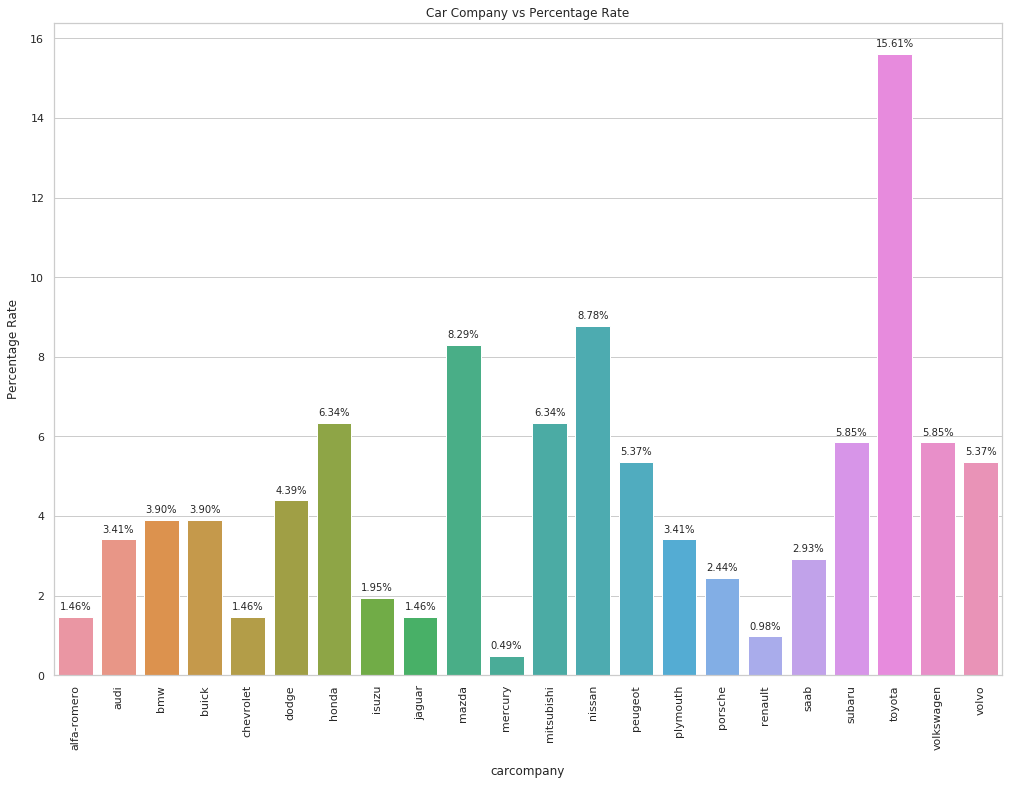

In [20]:
# 3.1 carcompany vs Percentage Rate
series = car['carcompany'].value_counts(dropna = False, normalize = True) * 100

print(series)
print('\n')

plt.figure(figsize = (17, 12))

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)

plt.xticks(rotation = 90)
plt.title('Car Company vs Percentage Rate')
plt.xlabel('carcompany', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.show()

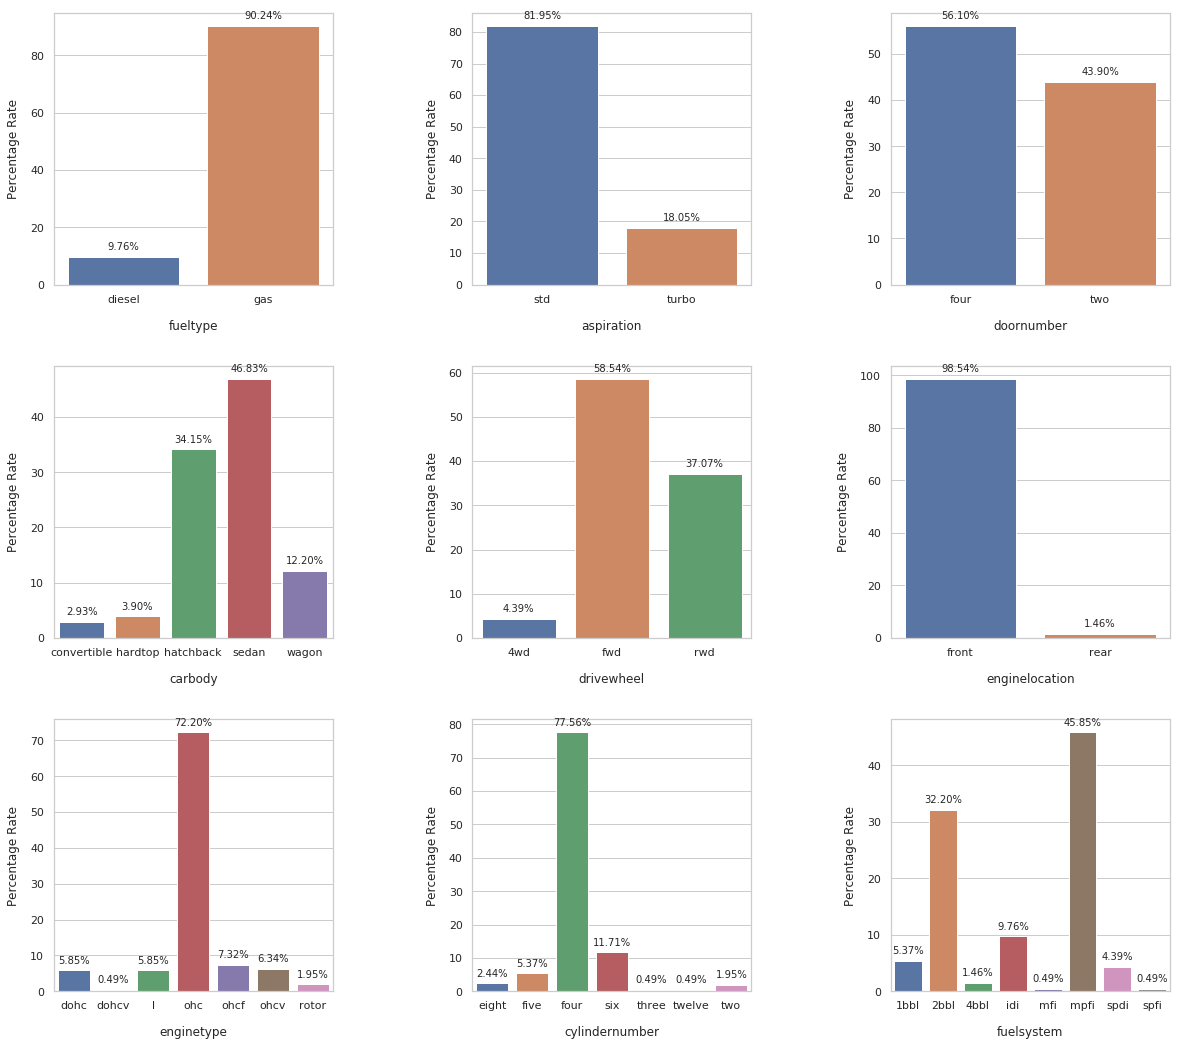

In [21]:
# 3.2 Univariate Plot Analysis of other categorical variables vs Percentage Rate
category_list = list(car.columns[car.dtypes == 'category'])
counter = 1

plt.figure(figsize = (20, 18))

for col_list in category_list:
    
    if col_list != 'carcompany':
        
        series = car[col_list].value_counts(normalize = True) * 100
        
        plt.subplot(3, 3, counter)
        ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
        plt.xlabel(col_list, labelpad = 15)
        plt.ylabel('Percentage Rate', labelpad = 10)
        
        # Call Custom Function
        add_data_labels(ax)
        
        counter += 1

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

> #### <font color = DarkCyan>Univariate Analysis Findings:</font>
>> 1. Car Company having highest number of vehicles:
 - toyota (15.61%)
 - nissan (8.78%)
 - mazda  (8.29%)
 - honda and mitsubishi (6.34%)
<br><br>
>> 2. Most preferred fuel type:
 - gas (90.24%)
<br><br>
>> 3. Most preferred aspiration:
 - std (81.95%)
<br><br>
>> 4. Most preferred door number:
 - four (56.10%)
<br><br>
>> 5. Top 3 preferred car body:
 - sedan    (46.83%)
 - hatchbag (34.15%)
 - wagon    (12.20%)
<br><br>
>> 6. Top 2 preferred drive wheel:
 - fwd (58.54%)
 - rwd (37.07%)
<br><br>
>> 7. Most preferred engine location:
 - front (98.54%)
<br><br>
>> 8. Most preferred engine type:
 - ohc (77.20%)
<br><br>
>> 9. Most preferred cylinder number:
 - four (77.56%)
<br><br>
>> 10. Most preferred fuel system:
 - mpfi (77.20%)

### <font color = brown>Bivariate Analysis -  Categorical</font>

carcompany
jaguar        35550.0000
buick         32892.0000
porsche       32528.0000
bmw           22835.0000
volvo         18420.0000
audi          17710.0000
peugeot       16630.0000
mercury       16503.0000
alfa-romero   16500.0000
saab          15275.0000
mazda         10595.0000
volkswagen     9737.5000
renault        9595.0000
toyota         9103.0000
isuzu          8916.5000
mitsubishi     8499.0000
nissan         8124.0000
subaru         7894.0000
plymouth       7609.0000
dodge          7609.0000
honda          7295.0000
chevrolet      6295.0000
Name: price, dtype: float64




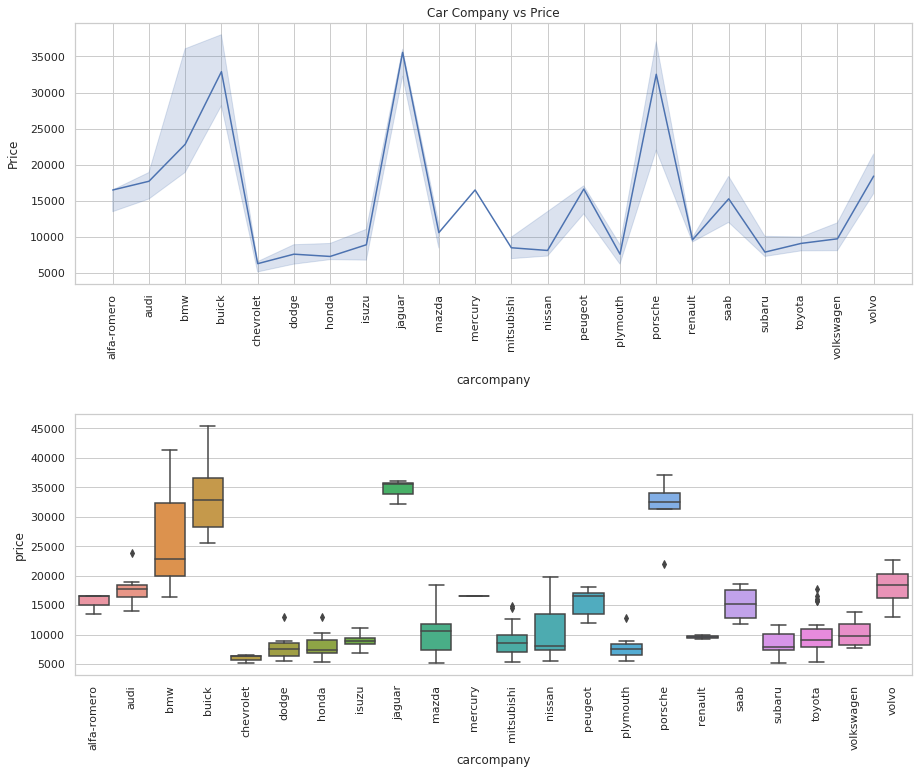

In [22]:
# 3.3 Bivariate Plot Analysis of carcompany vs price
print(car.groupby(by = 'carcompany').price.median().sort_values(ascending = False))
print('\n')

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.lineplot(x = 'carcompany', y = 'price', data = car, estimator = np.median)
plt.xticks(rotation = 90)
plt.title('Car Company vs Price')
plt.xlabel('carcompany', labelpad = 15)
plt.ylabel('Price', labelpad = 10)

plt.subplot(2, 1, 2)
sns.boxplot(x = 'carcompany', y = 'price', data = car)
plt.xticks(rotation = 90)

plt.subplots_adjust(hspace = 0.5)
plt.show()

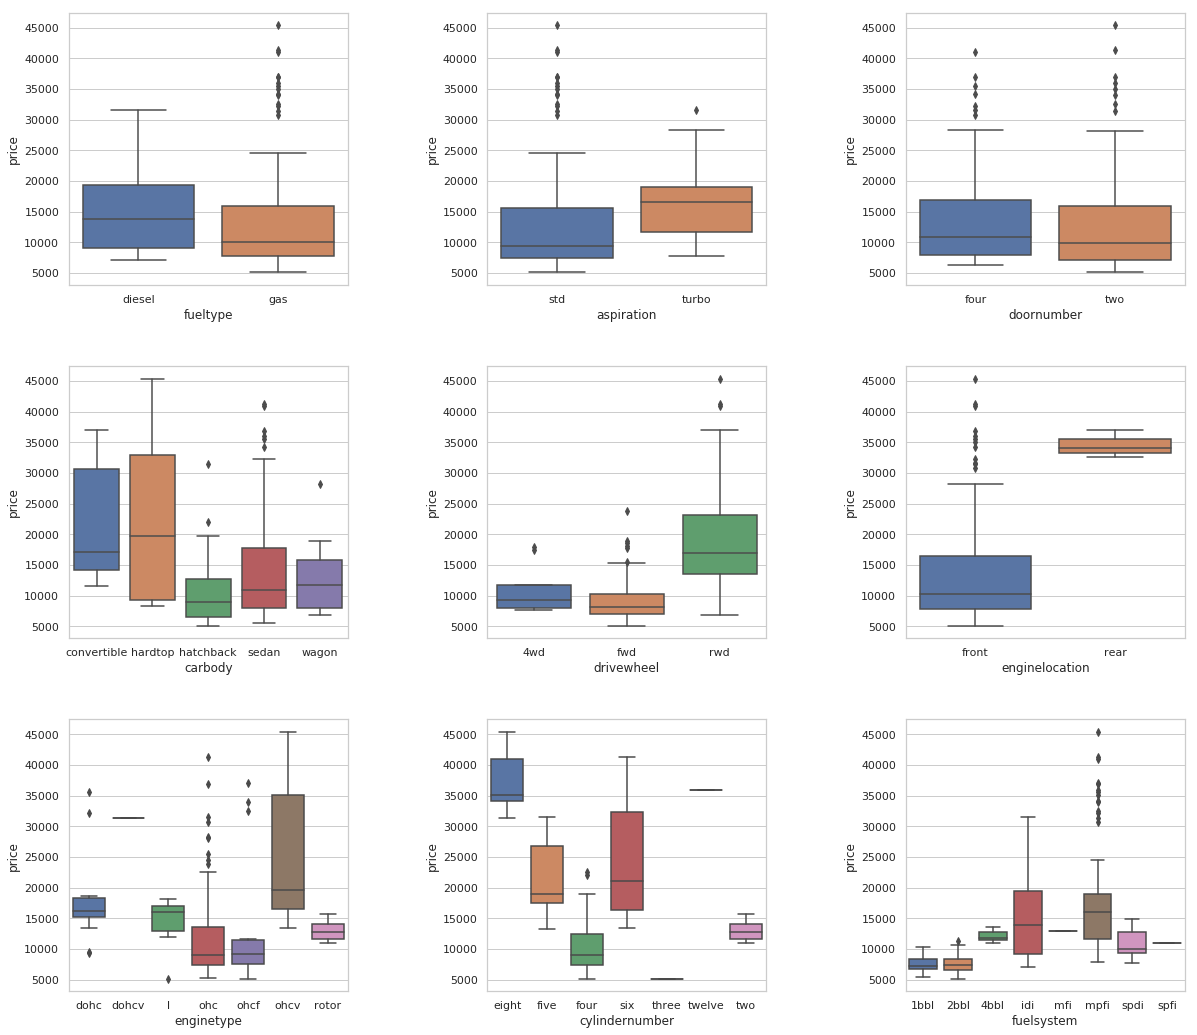

In [23]:
# 3.4 Bivariate Plot Analysis of other categorical variables vs price
category_list = list(car.columns[car.dtypes == 'category'])
counter = 1

plt.figure(figsize = (20, 18))

for col_list in category_list:
    
    if col_list != 'carcompany':
        
        plt.subplot(3, 3, counter)
        sns.boxplot(x = col_list, y = 'price', data = car)
        
        counter += 1

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

> #### <font color = DarkCyan>Bivariate Analysis - Categorical Findings:</font>
>> 1. Top 5 Car Price (highest to lowest):
 - jaguar
 - buick
 - porsche
 - bmw
 - volvo
<br><br>
>> 2. There are some outliers explaining the fact that the companies produce cars of much higher price range than normal market price.
<br><br>
>> 3. There is no major significance of price based on fuel type with the exception of expensive cars belonging to fueltype gas.
<br><br>
>> 4. turbo aspiration is bit higher than standard aspiration. Exception - Expensive Cars
<br><br>
>> 5. Drive Wheel of rwd (rear wheel drive) is expensive than 4wd (four wheel drive) and fwd (fron wheel drive)
<br><br>
>> 6. Rear Enging location is expensive than front.
<br><br>
>> 7. Price increases as the cylinder number increases.

### <font color = brown>Bivariate Analysis -  Continuous</font>

In [24]:
# 3.5 Generate descriptive statistics of continuous variables

car.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


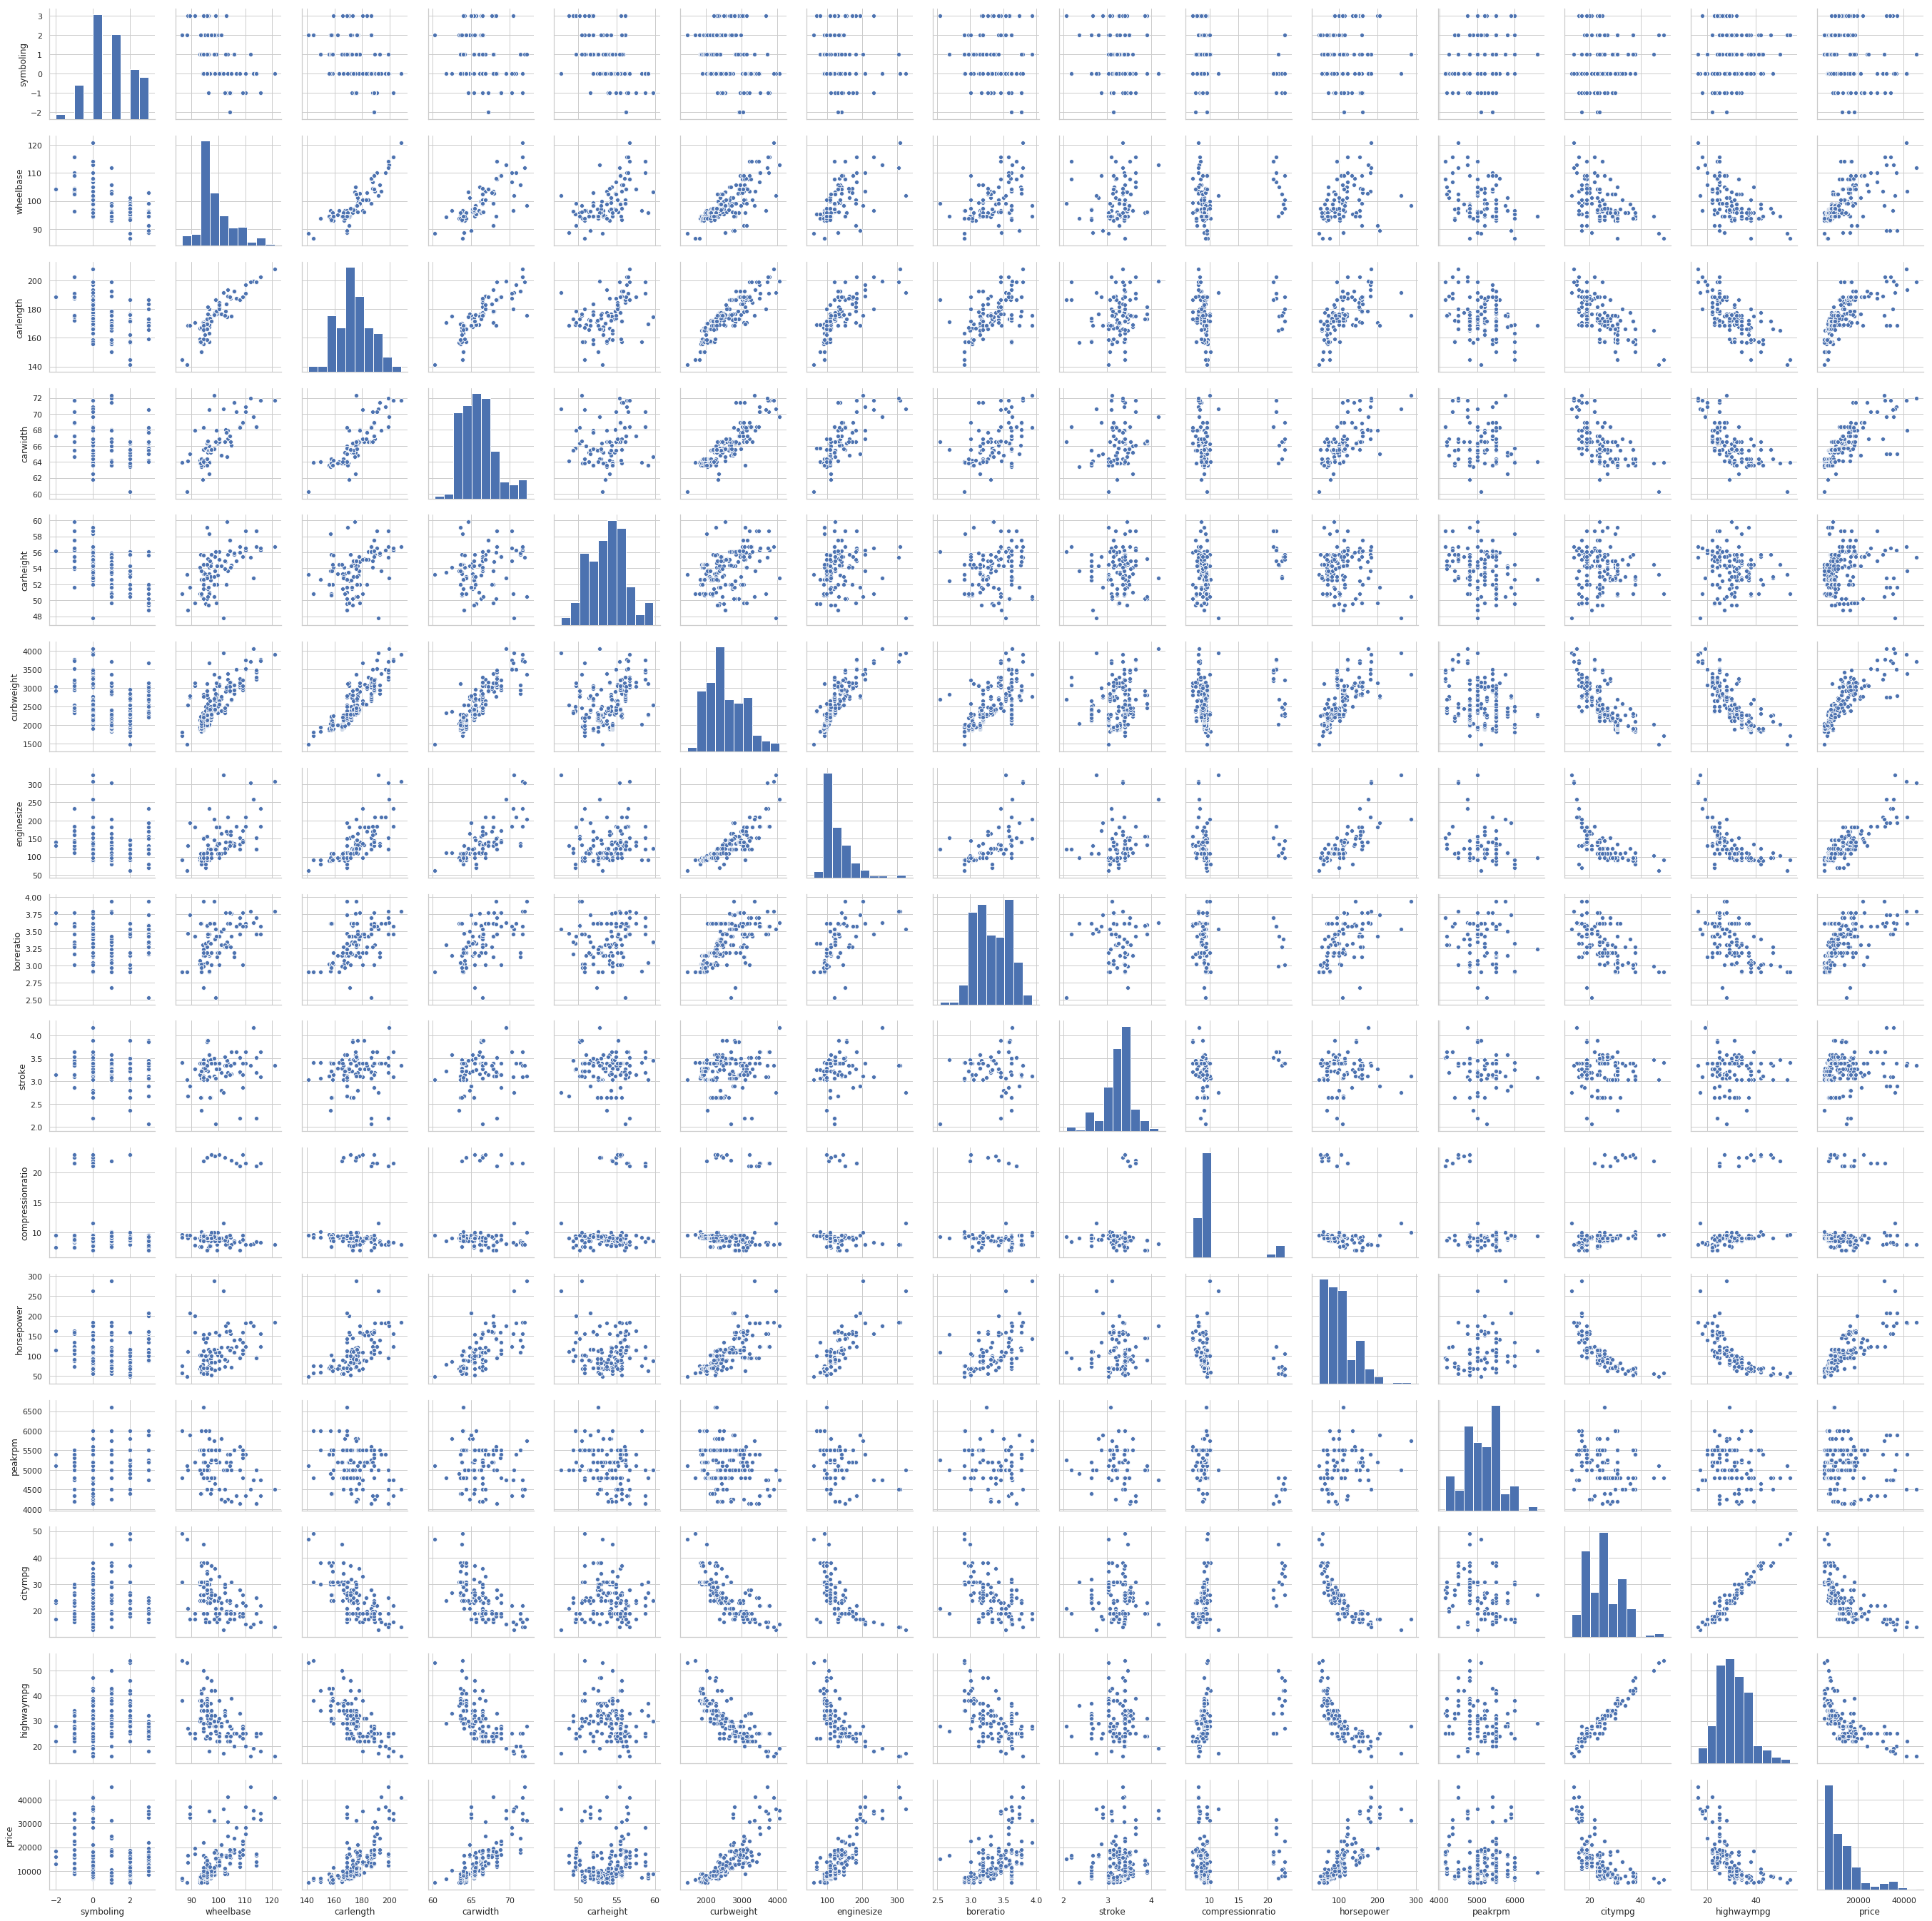

In [25]:
# 3.6 Generate Pairplot
sns.pairplot(car)

plt.show()

In [26]:
# 3.7 Generate Correlation
car.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.0000,-0.5320,-0.3576,-0.2329,-0.5410,-0.2277,-0.1058,-0.1301,-0.0087,-0.1785,0.0709,0.2736,-0.0358,0.0346,-0.0800
wheelbase,-0.5320,1.0000,0.8746,0.7951,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,-0.4704,-0.5441,0.5778
carlength,-0.3576,0.8746,1.0000,0.8411,0.4910,0.8777,0.6834,0.6065,0.1295,0.1584,0.5526,-0.2872,-0.6709,-0.7047,0.6829
carwidth,-0.2329,0.7951,0.8411,1.0000,0.2792,0.8670,0.7354,0.5591,0.1829,0.1811,0.6407,-0.2200,-0.6427,-0.6772,0.7593
carheight,-0.5410,0.5894,0.4910,0.2792,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,-0.0486,-0.1074,0.1193
curbweight,-0.2277,0.7764,0.8777,0.8670,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,-0.7574,-0.7975,0.8353
enginesize,-0.1058,0.5693,0.6834,0.7354,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,-0.6537,-0.6775,0.8741
boreratio,-0.1301,0.4887,0.6065,0.5591,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,-0.5845,-0.5870,0.5532
stroke,-0.0087,0.1610,0.1295,0.1829,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,-0.0421,-0.0439,0.0794
compressionratio,-0.1785,0.2498,0.1584,0.1811,0.2612,0.1514,0.0290,0.0052,0.1861,1.0000,-0.2043,-0.4357,0.3247,0.2652,0.0680


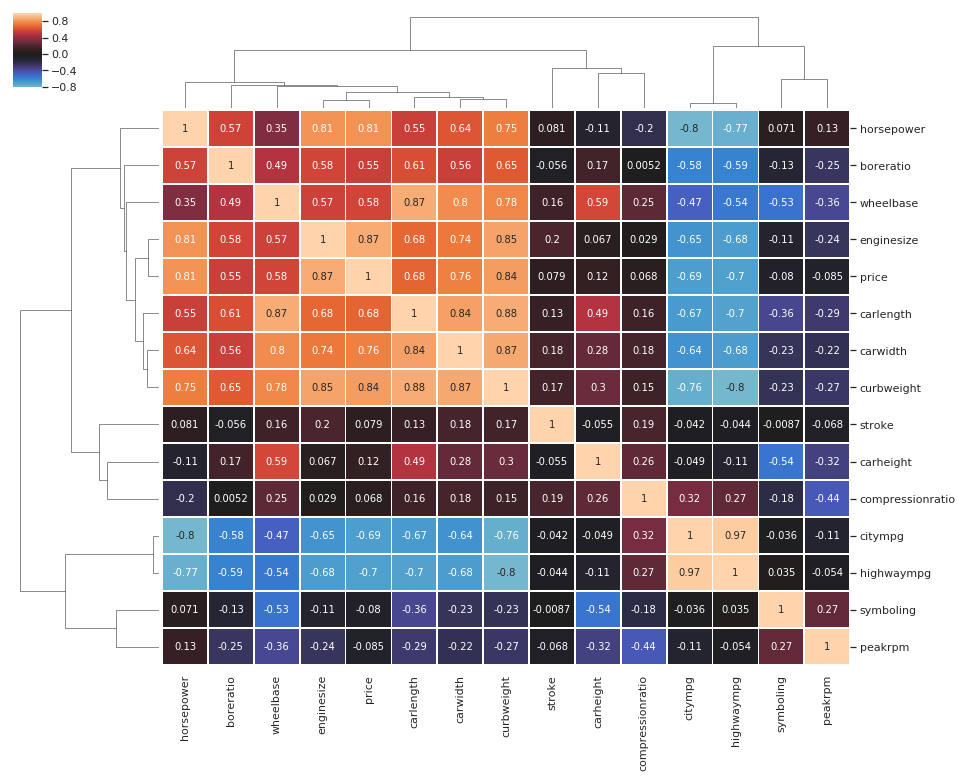

In [27]:
# 3.8 Generate Cluster or Heat map

kwargs = {'annot': True}

sns.clustermap(car.corr(), center = 0, linewidths = 0.75, figsize = (15, 12), **kwargs)

plt.show()

> #### <font color = DarkCyan>Bivariate Analysis - Continuous Findings:</font>
>> 1. Price is positively correlated with:
 - enginesize (0.87)
 - curbweight (0.84)
 - horsepower (0.81)
 - carwidth (0.76)
 - carlength (0.68)
<br><br>
>> 2. Price is negatively correlated with:
 - highwaympg  (-0.7)
 - citympg (-0.69)
<br><br>
>> 3. There is a high correlation between `highwaympg` and `citympg` (Corr value = 0.97).
<br><br>
>> 4. There is a high correlation between `carlength`, `carwidth`, `curbweight`, `enginesize` and `horsepower` (Corr value > 0.8)

### <font color = brown>Multicolinearity Removal</font>

From the heatmap, we got:
<font color = DarkGoldenRod>
> - `carlength` is highly correlated with `carwidth` (corr = 0.84)
- `carlength` is highly correlated with `curbweight` (corr = 0.88)
- `carwidth` is highly correlated with `curbweight` (corr = 0.87)
- `curbweight` is highly correlated with `enginesize` (corr = 0.85)
- `enginesize` is highly correlated with `horsepower` (corr = 0.81)
- `highwaympg` is highly correlated with `citympg` (corr = 0.97)
</font>

From the above, we can drop `carlength` and `carwidth` as both are higly correlated with `curbweight`. Similarily both `highwaympg` and `citympg` can be dropped.

There are some addition highly correlated variables like `curbweight`, `enginesize` and `horsepower`, that are correlated with the outcome variable `price`. We are not drpping these variable in the intial stage. During model preparation, if it turns out that it is not significant (p > 0.05) or VIF is high, we can definitely drop the variables at that point of time one by one.

In [28]:
# 3.9 Dropping the original variables
car.drop(columns = ['carlength', 'carwidth', 'highwaympg', 'citympg'], axis = 1, inplace = True)

# Data Glimpse
car.head()

,symboling,carcompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price
car_ID,,,,,,,,,,,,,,,,,,,,,
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,17450.0000


In [29]:
# 3.10 Generate new correlation and heatmap plotting

car.corr()

,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
symboling,1.0000,-0.5320,-0.5410,-0.2277,-0.1058,-0.1301,-0.0087,-0.1785,0.0709,0.2736,-0.0800
wheelbase,-0.5320,1.0000,0.5894,0.7764,0.5693,0.4887,0.1610,0.2498,0.3533,-0.3605,0.5778
carheight,-0.5410,0.5894,1.0000,0.2956,0.0671,0.1711,-0.0553,0.2612,-0.1088,-0.3204,0.1193
curbweight,-0.2277,0.7764,0.2956,1.0000,0.8506,0.6485,0.1688,0.1514,0.7507,-0.2662,0.8353
enginesize,-0.1058,0.5693,0.0671,0.8506,1.0000,0.5838,0.2031,0.0290,0.8098,-0.2447,0.8741
boreratio,-0.1301,0.4887,0.1711,0.6485,0.5838,1.0000,-0.0559,0.0052,0.5737,-0.2550,0.5532
stroke,-0.0087,0.1610,-0.0553,0.1688,0.2031,-0.0559,1.0000,0.1861,0.0809,-0.0680,0.0794
compressionratio,-0.1785,0.2498,0.2612,0.1514,0.0290,0.0052,0.1861,1.0000,-0.2043,-0.4357,0.0680
horsepower,0.0709,0.3533,-0.1088,0.7507,0.8098,0.5737,0.0809,-0.2043,1.0000,0.1311,0.8081
peakrpm,0.2736,-0.3605,-0.3204,-0.2662,-0.2447,-0.2550,-0.0680,-0.4357,0.1311,1.0000,-0.0853


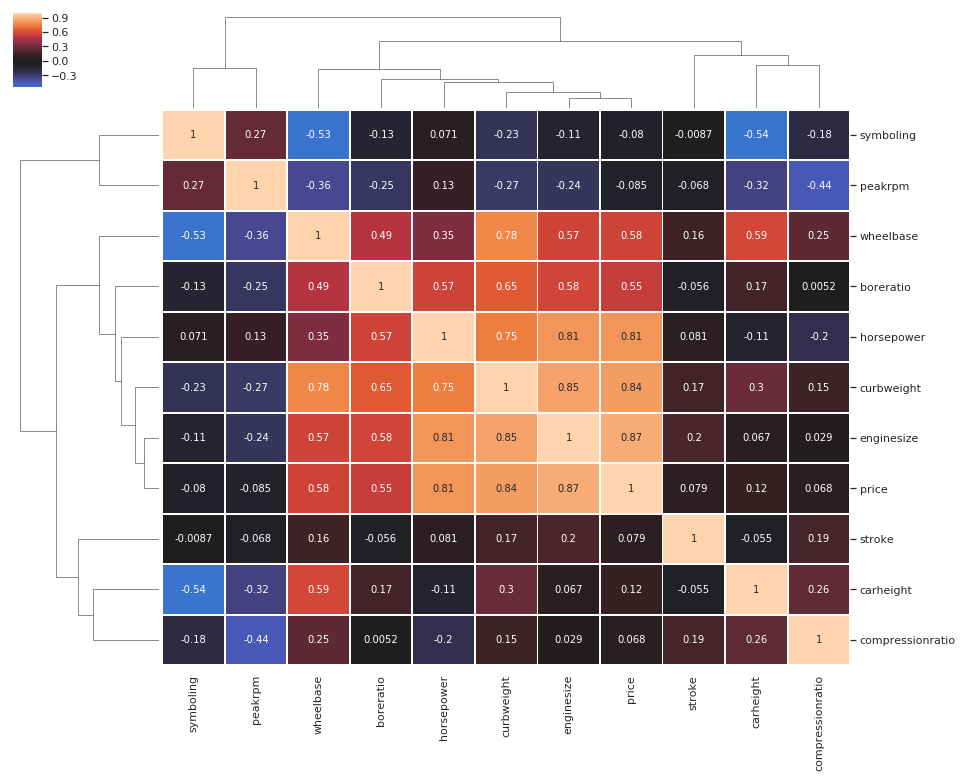

In [30]:
# 3.11 Generate Cluster or Heat map

kwargs = {'annot': True}

sns.clustermap(car.corr(), center = 0, linewidths = 0.75, figsize = (15, 12), **kwargs)

plt.show()

### <font color = brown>Outlier: Detection</font>

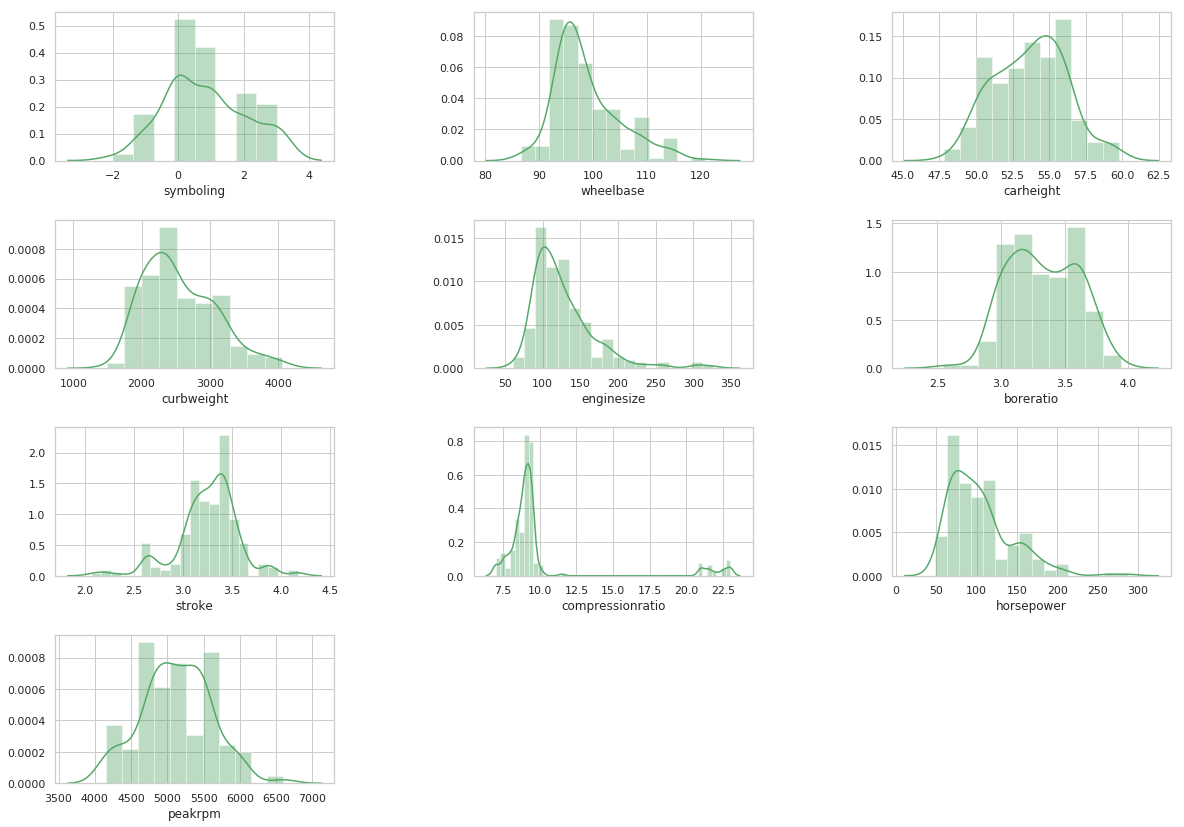

In [31]:
# 3.11 Distribution Plot of numerical variables
number_list = list(car.columns[car.dtypes != 'category'])
counter = 1

plt.figure(figsize = (20, 18))

for col_list in number_list:
    
    if col_list != 'price':
        
        plt.subplot(5, 3, counter)
        sns.distplot(car[col_list], hist = True, kde = True, color = 'g')
        
        counter += 1

plt.subplots_adjust(hspace = 0.4)
plt.subplots_adjust(wspace = 0.5)
plt.show()

There are some variables (like `compressionratio`, `wheelbase`, `horsepower`, etc) that are not normally distributed, that is, outliers are present. Due to presence of less number of observation, we are not deleting some rows to correct the outliers. We will be doing the scaling in both train and test data to correct this.

## <font color=green>4. Model Preparation</font>

<br><br><font color = DarkGoldenRod>**Symboling:**</font>
 As per Data Dictionary, Variable `symboling` is insurance risk rating with +3 as risky and -3 as pretty safe. Since it is a categorical field, so the values can be divided into categories like:

 - **risky** for range [2, 3]
 - **moderate** for range [0, 1]
 - **safe** for range [-1, -3]

In [32]:
# Initial Value of variable symboling
car.symboling.value_counts(sort = False, dropna = False)

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [33]:
# Setting values in the variable symboling
car['symboling'] = car['symboling'].map({ 3: 'risky',
                                          2: 'risky',
                                          1: 'moderate',
                                          0: 'moderate',
                                         -1: 'safe',
                                         -2: 'safe',
                                         -3: 'safe'})

# Mapping the column as Category data type
car['symboling'] = car['symboling'].astype('category')

In [34]:
# Final Value of variable symboling
car.symboling.value_counts(sort = False, dropna = False)

moderate    121
risky        59
safe         25
Name: symboling, dtype: int64

<br><br><br><font color = DarkGoldenRod>**Car Company:**</font>
Variable `carcompany` has wide range of data points or labels (22 unique data). Encoding with **pandas get_dummies** will create 22 additional columns and with drop of 1 column (drop_first = True), 21 additional columns will be created. This will ultimately create:

> 1. Complexity
> 2. Hard to get the list of car companies that form a linear regression with price.

As it is a categorical field and dependent on price (Based on the domain knowledge, we can say that the brand value of the car company affects the price), so the car company values, based on central tendency (average) of price, can be divided into 3 main categories like:

> - **premium_tier**, when the car company average price is greater than 20,000
> - **mid_tier**, when the car company average price is between 10,000 to 20,000
> - **low_tier**, when the car company average price is less than 10,000

In [35]:
# Summary Statistics of carcompany with price
car[['carcompany', 'price']].describe()

,price
count,205.0000
mean,13276.7106
std,7988.8523
min,5118.0000
25%,7788.0000
50%,10295.0000
75%,16503.0000
max,45400.0000


In [36]:
# Summary Statistics price for each carcompany
car.groupby('carcompany').price.median().sort_values(ascending = False)

carcompany
jaguar        35550.0000
buick         32892.0000
porsche       32528.0000
bmw           22835.0000
volvo         18420.0000
audi          17710.0000
peugeot       16630.0000
mercury       16503.0000
alfa-romero   16500.0000
saab          15275.0000
mazda         10595.0000
volkswagen     9737.5000
renault        9595.0000
toyota         9103.0000
isuzu          8916.5000
mitsubishi     8499.0000
nissan         8124.0000
subaru         7894.0000
plymouth       7609.0000
dodge          7609.0000
honda          7295.0000
chevrolet      6295.0000
Name: price, dtype: float64

In [37]:
# Custom Function to get carcompany_category
def get_carcompany_category():
    
    for company_list in car.carcompany.unique().to_list():
        
        df = car[car['carcompany'] == company_list]
        
        if df.price.median() > 20000:
            lv_category = 'premium_tier'
        c
        elif df.price.median() > 10000:
            lv_category = 'mid_tier'
        
        else:
            lv_category = 'low_tier'
        
        car.loc[car['carcompany'] == company_list, 'carcompany_category'] = lv_category
        
    # Mapping the column as Category data type
    car['carcompany_category'] = car['carcompany_category'].astype('category')

# Call Function
get_carcompany_category()

# Data Glimpse
pd.crosstab(car.carcompany, car.carcompany_category)

carcompany_category,low_tier,mid_tier,premium_tier
carcompany,,,
alfa-romero,0,3,0
audi,0,7,0
bmw,0,0,8
buick,0,0,8
chevrolet,3,0,0
dodge,9,0,0
honda,13,0,0
isuzu,4,0,0
jaguar,0,0,3


<br><br><br><font color = DarkGoldenRod>**Binary Encoding:**</font>
Maping Variable `fueltype`, `aspiration`, `enginelocation` and `doornumber` to binary values (0, 1).

In [38]:
car['fueltype'] = car.fueltype.map({'diesel': 0, 'gas': 1})
car['aspiration'] = car.aspiration.map({'turbo': 0, 'std': 1})
car['enginelocation'] = car.enginelocation.map({'rear': 0, 'front': 1})
car['doornumber'] = car.doornumber.map({'two': 0, 'four': 1})

<br><br><br><font color = DarkGoldenRod>**Dummy Variable:**</font>
Setting dummy values to variable - `symboling`, `carbody`, `drivewheel`, `fuelsystem`, `cylindernumber`, `enginetype` and `carcompany_category`

In [39]:
col = ['symboling', 'carbody', 'drivewheel', 'fuelsystem', 'cylindernumber', 'enginetype', 'carcompany_category']

status = pd.get_dummies(car[col])

car = pd.concat([car, status], axis = 1)

# Based on the Bivariate Analysis (Categorical) with price (Box Plot done in the top section), we can go for 
# dropping one dummy variable from each section that is least affected with price.

drop_list = ['symboling_risky', 'carbody_hatchback', 'drivewheel_4wd', 'fuelsystem_1bbl', 'cylindernumber_three', 
             'enginetype_rotor', 'carcompany_category_low_tier']

car.drop(columns = drop_list, axis = 1, inplace = True)

# Data Glimpse
car.head()

,symboling,carcompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carcompany_category,symboling_moderate,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,carcompany_category_mid_tier,carcompany_category_premium_tier
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,risky,alfa-romero,1,1,0,convertible,rwd,1,88.6000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,13495.0000,mid_tier,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,risky,alfa-romero,1,1,0,convertible,rwd,1,88.6000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,16500.0000,mid_tier,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,moderate,alfa-romero,1,1,0,hatchback,rwd,1,94.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,16500.0000,mid_tier,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,risky,audi,1,1,1,sedan,fwd,1,99.8000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,13950.0000,mid_tier,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,risky,audi,1,1,1,sedan,4wd,1,99.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,17450.0000,mid_tier,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [40]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 51 columns):
symboling                           205 non-null category
carcompany                          205 non-null category
fueltype                            205 non-null int64
aspiration                          205 non-null int64
doornumber                          205 non-null int64
carbody                             205 non-null category
drivewheel                          205 non-null category
enginelocation                      205 non-null int64
wheelbase                           205 non-null float64
carheight                           205 non-null float64
curbweight                          205 non-null int64
enginetype                          205 non-null category
cylindernumber                      205 non-null category
enginesize                          205 non-null int64
fuelsystem                          205 non-null category
boreratio                           205 non-n

<br><br><br><font color = DarkGoldenRod>**Non-Numerical Variables Drop:**</font>
Dropping all left non-numerical or categorical variables

In [41]:
category_list = list(car.columns[car.dtypes == 'category'])

car.drop(columns = category_list, inplace = True)

# Data Glimpse
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,symboling_moderate,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,carcompany_category_mid_tier,carcompany_category_premium_tier
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,13495.0000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,16500.0000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,1,1,0,1,94.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,16500.0000,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,1,1,1,1,99.8000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,13950.0000,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1,1,1,1,99.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,17450.0000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [42]:
# Dataframe Shape
car.shape

(205, 43)

In [43]:
# Concise Summary
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 43 columns):
fueltype                            205 non-null int64
aspiration                          205 non-null int64
doornumber                          205 non-null int64
enginelocation                      205 non-null int64
wheelbase                           205 non-null float64
carheight                           205 non-null float64
curbweight                          205 non-null int64
enginesize                          205 non-null int64
boreratio                           205 non-null float64
stroke                              205 non-null float64
compressionratio                    205 non-null float64
horsepower                          205 non-null int64
peakrpm                             205 non-null int64
price                               205 non-null float64
symboling_moderate                  205 non-null uint8
symboling_safe                      205 non-null uint8
car

## <font color=green>5. Training and Testing Set Data Splitting</font>

In [44]:
# from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### <font color = brown>Feature Scaling</font>

In [45]:
# from sklearn.preprocessing import MinMaxScaler

# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = MinMaxScaler()

In [46]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,symboling_moderate,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,carcompany_category_mid_tier,carcompany_category_premium_tier
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
122,1,1,1,1,0.2448,0.2655,0.2727,0.1396,0.2302,0.5253,0.1500,0.0833,0.5510,0.0688,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
125,1,1,0,1,0.2724,0.2124,0.5004,0.3396,1.0000,0.4646,0.1562,0.3958,0.5510,0.4669,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
166,1,1,0,1,0.2724,0.4248,0.3150,0.1396,0.4444,0.4495,0.1500,0.2667,1.0000,0.1221,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0.0690,0.0885,0.4112,0.2604,0.6270,0.2475,0.1250,0.2625,0.3469,0.3144,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
199,1,0,1,1,0.6103,0.8584,0.6474,0.2604,0.7460,0.4848,0.0312,0.4750,0.3878,0.3821,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [47]:
# Descriptive Statistics
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,symboling_moderate,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,carcompany_category_mid_tier,carcompany_category_premium_tier
count,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000,143.0000
mean,0.9091,0.8182,0.5594,0.9930,0.4111,0.5090,0.4079,0.2414,0.4979,0.5354,0.1908,0.2273,0.4000,0.2193,0.6503,0.1049,0.0280,0.0210,0.4755,0.1329,0.5944,0.3497,0.3497,0.0210,0.0909,0.0000,0.4406,0.0420,0.0000,0.0210,0.0629,0.7413,0.1329,0.0070,0.0280,0.0699,0.0070,0.0629,0.6853,0.0839,0.0629,0.2657,0.1189
std,0.2885,0.3871,0.4982,0.0836,0.2056,0.2154,0.2113,0.1546,0.2071,0.1578,0.2372,0.1655,0.1964,0.2157,0.4785,0.3075,0.1655,0.1438,0.5012,0.3406,0.4927,0.4785,0.4785,0.1438,0.2885,0.0000,0.4982,0.2012,0.0000,0.1438,0.2437,0.4395,0.3406,0.0836,0.1655,0.2559,0.0836,0.2437,0.4660,0.2782,0.2437,0.4433,0.3248
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,1.0000,0.0000,1.0000,0.2724,0.3540,0.2455,0.1358,0.3056,0.4646,0.1000,0.0917,0.2653,0.0673,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,1.0000,1.0000,1.0000,0.3414,0.5221,0.3557,0.1849,0.5000,0.5455,0.1250,0.1917,0.4286,0.1403,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,1.0000,1.0000,1.0000,0.5034,0.6681,0.5595,0.3019,0.6825,0.6111,0.1500,0.2833,0.5510,0.3135,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### <font color = brown>Dividing into X and Y sets for the model building</font>

In [48]:
y_train = df_train.pop('price')
X_train = df_train

In [49]:
# Get Dimension
X_train.shape

(143, 42)

## <font color=green>6. Model Building</font>
<br>
A mix approach will be used. First using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn) and then using the Statmodel for statistics analysis of the model.

### <br><font color = brown>RFE (Recursive Feature Elimination)</font>

In [50]:
# Importing RFE and LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 3),
 ('aspiration', False, 9),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('symboling_moderate', False, 24),
 ('symboling_safe', False, 11),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 22),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 18),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 15),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False, 19),
 ('fuelsystem_idi', False, 10),
 ('fuelsystem_mfi', False, 27),
 ('fuelsystem_mpfi', False, 25),
 ('fuelsystem_spdi', False, 6),
 ('fuelsystem_spfi', False, 28),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve',

In [52]:
col = X_train.columns[rfe.support_]

col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'carbody_convertible', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'enginetype_ohc',
       'carcompany_category_premium_tier'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'compressionratio',
       'peakrpm', 'symboling_moderate', 'symboling_safe', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'cylindernumber_two', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_ohcv', 'carcompany_category_mid_tier'],
      dtype='object')

### <br><font color = brown>Building model using statsmodel, for the detailed statistics</font>

In [54]:
# Define a Custom Function for printing the statsmodel summary
def get_stats(X_train_rfe):
    
    # Adding a constant variable
    # import statsmodels.api as sm
    X_train_rfe = sm.add_constant(X_train_rfe)
    
    # Running the linear model
    lm = sm.OLS(y_train,X_train_rfe).fit()
    
    # Print Summary of linear model
    print(lm.summary())
    
    return lm

In [55]:
# Custom Function to get VIF
def get_VIF(X_train):

    #from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    vif = pd.DataFrame()
    
    X = X_train
    
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return(vif)

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
# Call Custom Function to get OLS Regression Results
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           1.19e-68
Time:                        15:59:04   Log-Likelihood:                 214.90
No. Observations:                 143   AIC:                            -397.8
Df Residuals:                     127   BIC:                            -350.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [58]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
3,enginesize,118.2700
0,enginelocation,88.2900
2,curbweight,65.9400
5,stroke,44.7300
10,cylindernumber_four,40.3100
4,boreratio,38.2100
1,wheelbase,25.8700
11,cylindernumber_six,23.5100
6,horsepower,17.3000
13,enginetype_ohc,9.7500


> #### <font color = DarkCyan>Findings:</font>
>> - `boreratio` has p-value > 0.05 and high VIF (> 5). So, it is insignificant and can be dropped.

In [59]:
# Drop Column
X_train_rfe.drop(columns = 'boreratio', axis = 1, inplace = True)

In [60]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           4.23e-69
Time:                        15:59:04   Log-Likelihood:                 213.28
No. Observations:                 143   AIC:                            -396.6
Df Residuals:                     128   BIC:                            -352.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [61]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
3,enginesize,70.2300
2,curbweight,65.8400
0,enginelocation,53.5100
9,cylindernumber_four,38.2200
4,stroke,29.5500
1,wheelbase,25.8700
5,horsepower,14.1800
10,cylindernumber_six,13.2200
12,enginetype_ohc,9.6300
8,cylindernumber_five,5.4300


> #### <font color = DarkCyan>Findings:</font>
>> - `cylindernumber_eight` has p-value > 0.05. So, it is insignificant and can be dropped.

In [62]:
# Drop Column
X_train_rfe.drop(columns = 'cylindernumber_eight', axis = 1, inplace = True)

In [63]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           1.91e-69
Time:                        15:59:05   Log-Likelihood:                 211.37
No. Observations:                 143   AIC:                            -394.7
Df Residuals:                     129   BIC:                            -353.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [64]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
2,curbweight,60.2600
3,enginesize,42.1500
0,enginelocation,36.3500
1,wheelbase,25.8500
4,stroke,24.0900
8,cylindernumber_four,19.7300
5,horsepower,13.7800
11,enginetype_ohc,8.8600
9,cylindernumber_six,4.7300
12,carcompany_category_premium_tier,3.0900


> #### <font color = DarkCyan>Findings:</font>
>> - `cylindernumber_twelve` has p-value > 0.05. So, it is insignificant and can be dropped.

In [65]:
# Drop Column
X_train_rfe.drop(columns = 'cylindernumber_twelve', axis = 1, inplace = True)

In [66]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.37e-70
Time:                        15:59:05   Log-Likelihood:                 210.87
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     130   BIC:                            -357.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [67]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
2,curbweight,59.0400
0,enginelocation,33.1800
3,enginesize,26.3300
1,wheelbase,25.4600
4,stroke,20.4900
8,cylindernumber_four,17.5100
5,horsepower,13.7600
10,enginetype_ohc,8.4600
9,cylindernumber_six,3.3700
11,carcompany_category_premium_tier,2.8200


> #### <font color = DarkCyan>Findings:</font>
>> - `enginesize` has p-value > 0.05 and high VIF (> 10). So, it is insignificant and can be dropped.

In [68]:
# Drop Column
X_train_rfe.drop(columns = 'enginesize', axis = 1, inplace = True)

In [69]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.09e-71
Time:                        15:59:05   Log-Likelihood:                 210.69
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     131   BIC:                            -361.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [70]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
2,curbweight,50.2500
0,enginelocation,32.4200
1,wheelbase,25.4400
3,stroke,19.8700
7,cylindernumber_four,17.1900
4,horsepower,12.1500
9,enginetype_ohc,8.4600
8,cylindernumber_six,3.1500
6,cylindernumber_five,2.7200
10,carcompany_category_premium_tier,2.3000


> #### <font color = DarkCyan>Findings:</font>
>> - `stroke` has p-value > 0.05 and high VIF (> 10). So, it is insignificant and can be dropped.

In [71]:
# Drop Column
X_train_rfe.drop(columns = 'stroke', axis = 1, inplace = True)

In [72]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     182.1
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           4.11e-72
Time:                        15:59:05   Log-Likelihood:                 209.59
No. Observations:                 143   AIC:                            -397.2
Df Residuals:                     132   BIC:                            -364.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [73]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
2,curbweight,47.7200
0,enginelocation,27.2200
1,wheelbase,25.4000
6,cylindernumber_four,16.9400
3,horsepower,12.1500
8,enginetype_ohc,6.0200
7,cylindernumber_six,3.1400
5,cylindernumber_five,2.6900
9,carcompany_category_premium_tier,2.1900
4,carbody_convertible,1.3800


> #### <font color = DarkCyan>Findings:</font>
>> - `cylindernumber_five` has p-value > 0.05. So, it is insignificant and can be dropped.

In [74]:
# Drop Column
X_train_rfe.drop(columns = 'cylindernumber_five', axis = 1, inplace = True)

In [75]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           1.14e-72
Time:                        15:59:05   Log-Likelihood:                 208.08
No. Observations:                 143   AIC:                            -396.2
Df Residuals:                     133   BIC:                            -366.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [76]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
2,curbweight,46.6900
0,enginelocation,25.4900
1,wheelbase,25.2400
3,horsepower,12.0900
5,cylindernumber_four,8.6500
7,enginetype_ohc,4.6000
8,carcompany_category_premium_tier,2.0900
6,cylindernumber_six,2.0600
4,carbody_convertible,1.3800


> #### <font color = DarkCyan>Findings:</font>
>> - `cylindernumber_six` has p-value > 0.05. So, it is insignificant and can be dropped.

In [77]:
# Drop Column
X_train_rfe.drop(columns = 'cylindernumber_six', axis = 1, inplace = True)

In [78]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           1.06e-73
Time:                        15:59:05   Log-Likelihood:                 207.68
No. Observations:                 143   AIC:                            -397.4
Df Residuals:                     134   BIC:                            -370.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [79]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
2,curbweight,46.6900
1,wheelbase,25.2400
0,enginelocation,24.0700
3,horsepower,11.8100
5,cylindernumber_four,7.1400
6,enginetype_ohc,4.5900
7,carcompany_category_premium_tier,2.0900
4,carbody_convertible,1.3600


> #### <font color = DarkCyan>Findings:</font>
>> - `curbweight` has high VIF (> 10). So, it is a multicollinear problem and can be dropped.

In [80]:
# Drop Column
X_train_rfe.drop(columns = 'curbweight', axis = 1, inplace = True)

In [81]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     231.5
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           6.15e-72
Time:                        15:59:06   Log-Likelihood:                 200.38
No. Observations:                 143   AIC:                            -384.8
Df Residuals:                     135   BIC:                            -361.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [82]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
0,enginelocation,23.7800
1,wheelbase,7.3800
4,cylindernumber_four,7.1100
2,horsepower,5.9100
5,enginetype_ohc,4.5300
6,carcompany_category_premium_tier,2.0500
3,carbody_convertible,1.1600


> #### <font color = DarkCyan>Findings:</font>
>> - `enginelocation` has high VIF (> 10). So, it is a multicollinear problem and can be dropped.

In [83]:
# Drop Column
X_train_rfe.drop(columns = 'enginelocation', axis = 1, inplace = True)

In [84]:
# Call Custom Function to get stats
lm = get_stats(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     244.6
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.75e-70
Time:                        15:59:06   Log-Likelihood:                 193.37
No. Observations:                 143   AIC:                            -372.7
Df Residuals:                     136   BIC:                            -352.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [85]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
0,wheelbase,5.0800
3,cylindernumber_four,4.4500
1,horsepower,3.8500
4,enginetype_ohc,3.5400
5,carcompany_category_premium_tier,1.9600
2,carbody_convertible,1.1200


> #### <font color = DarkCyan>Findings:</font>
>> - `enginetype_ohc` has p-value > 0.05. So, it is insignificant and can be dropped.

In [86]:
# Drop Column
X_train_rfe.drop(columns = 'enginetype_ohc', axis = 1, inplace = True)

In [87]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train, X_train_lm).fit()
    
# Print Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           5.62e-71
Time:                        15:59:06   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [88]:
# Call Custom Function to get VIF
vif = get_VIF(X_train_rfe)

vif

,Features,VIF
0,wheelbase,5.0300
1,horsepower,3.8400
3,cylindernumber_four,2.4100
4,carcompany_category_premium_tier,1.8300
2,carbody_convertible,1.0900


> #### <font color = DarkCyan>Findings:</font>
<font color = ForestGreen>Now the VIF and p-value is within the range. Adjusted R squared is 0.91 which is quite significant. This can be concluded as the final model feature selection.</font>

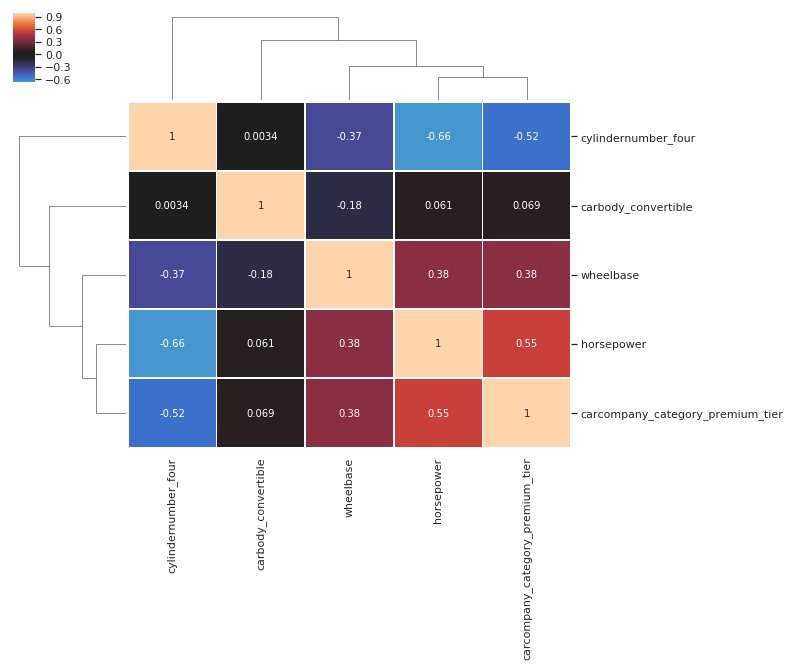

In [89]:
# Generate Cluster or Heat map

kwargs = {'annot': True}

sns.clustermap(X_train_rfe.corr(), center = 0, linewidths = 0.75, figsize = (10, 8), **kwargs)

plt.show()

## <br><font color = green>7. Residual Analysis of the Train Data</font>
<br>
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [90]:
y_train_price = lm.predict(X_train_lm)

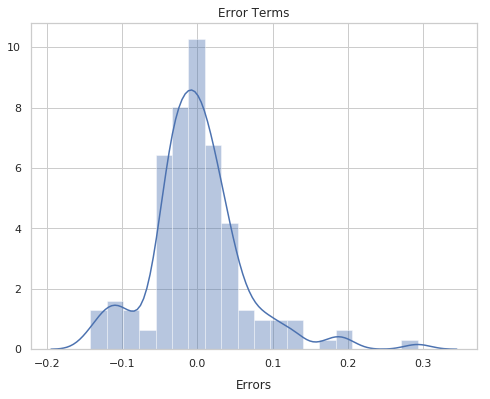

In [91]:
# Distribution Plot
plt.figure(figsize = (8, 6))

sns.distplot((y_train - y_train_price), bins = 20)

plt.xlabel('Errors', labelpad = 10)
plt.title('Error Terms')
plt.show()

Form the distribution plot, it can be visualized as the Error Distribution is close to the Normal Distribution.

## <font color=green>8. Making Predictions</font>


Applying the scaling on the test sets

In [92]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,symboling_moderate,symboling_safe,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,carcompany_category_mid_tier,carcompany_category_premium_tier
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
160,1,1,1,1,0.3138,0.4602,0.2351,0.1396,0.4048,0.4242,0.1250,0.0917,0.2653,0.0724,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
186,1,1,1,1,0.3690,0.6991,0.3053,0.1811,0.4048,0.6111,0.1250,0.1542,0.4490,0.0933,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
59,1,1,0,1,0.4207,0.5221,0.3479,0.2302,0.5635,0.6061,0.1000,0.1500,0.2653,0.1030,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
165,1,1,0,1,0.2724,0.4248,0.3014,0.1396,0.4444,0.4495,0.1500,0.2667,1.0000,0.1155,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
140,1,1,0,1,0.2310,0.6991,0.2917,0.1774,0.7460,0.2273,0.1062,0.1042,0.1020,0.0687,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [93]:
# Dividing into X_test and y_test¶
y_test = df_test.pop('price')
X_test = df_test

In [94]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [95]:
# Making predictions
y_pred = lm.predict(X_test_new)

## <font color=green>9. Model Evaluation</font>

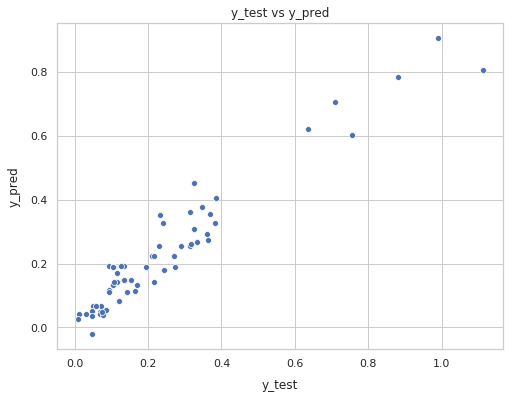

In [96]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (8, 6))

sns.scatterplot(x = y_test, y = y_pred)

plt.xlabel('y_test', labelpad = 10)
plt.ylabel('y_pred', labelpad = 10)
plt.title('y_test vs y_pred')
plt.show()


>From y_test vs y_pred scatter plot, we can infer that there are are some variations at the higher end but overall it can be fitted as a decent linear model.</font>

## <font color=green>10. Final Inference</font>

### <font color=Indigo>Which variables are significant in predicting the price of a car</font>
Final predictors and their corresponding Coefficients, p values and VIF values are:
    
| Predictors | Coefficients | p value | VIF
| --- | --- | --- | --- |
| wheelbase | 0.3249 | 0.00 | 5.03 |
| horsepower | 0.4945 | 0.00 | 3.84 |
| carbody_convertible | 0.1835 | 0.00 | 2.41 |
| cylindernumber_four | -0.0623 | 0.00 | 1.83 |
| carcompany_category_premium_tier | 0.2580 | 0.00 | 1.09 |

Equation of best fitted line is:

$ price = -0.0163 + 0.3249 \times wheelbase + 0.4945 \times horsepower + 0.1835 \times carbody\_convertible - 0.0623 \times cylindernumber\_four + 0.2580 \times carcompany\_category\_premium\_tier $

### <font color=Indigo>How well those variables describe the price of a car</font>
The equation of best fitted line indicate the price of the car changes by:

> 1. 0.3249 for every 1 unit change in `wheelbase`, if all variables are held constant.
<br>
> 2. 0.4945 for every 1 unit change in `horsepower`, if all variables are held constant.
<br>
> 3. 0.1835 for every 1 unit change in `carbody_convertible`, if all variables are held constant.
<br>
> 4. -0.062 for every 1 unit change in `cylindernumber_four`, if all variables are held constant. The negative coefficient is due the fact that cylindernumber_four is the most preferred (77.56%) one and is low in terms of price.
<br>
> 5. 0.2580 for every 1 unit change in `carcompany_category_premium_tier`, if all variables are held constant. So, Company brand is also a major factor in determining the price. **Price of car is high for higher brand**. Premium Tier Car Companies are:
>  - bmw
>  - buick
>  - jaguar
>  - porsche

So overall we can infer that it's a decent model, but we also acknowledge that we could do better. OLS Regression Results are:

| R-squared | Adj. R-squared | AIC | BIC |
| --- | --- | --- | --- |
| 0.914 | 0.910 | -372.7 | -354.2 |

We have a couple of options:

> 1. Add new features (area, volume, etc)
> 2. Build a non-linear model

### <font color=Indigo>Design Recommendation</font>
Along with the Price factor, Gilly Auto should consider the following points that are most preferred:

| Factors | Most Preferred |
| --- | --- |
| Fuel Type | gas |
| Aspiration | std |
| Door Number | four |
| Car Body | sedan |
| Drive Wheel | fwd |
| Engine Location | front |
| Engine Type | ohc |
| Cylinder Number | four |
| Fuel System | mpfi |